In [1]:
import kan
import kan.utils as ku
import torch
import torch.nn as nn
import numpy as np
from libraries import utils
from libraries import magnetization
from libraries import j1j2_functions
import numpy.random as npr
import qutip as qt
import matplotlib.pyplot as plt

In [27]:
Ns = [8, 10, 12, 14]
J2s = np.linspace(0, 0.5 - 0.5/100, 100)

In [3]:
deviation_percent = []
deviation_weight = []
for N in Ns:
    percents = []; weights = []
    gsz = qt.qload(f'N{N}/n{N}gs_J2_0.0')
    statez, signsz = utils.get_nonzero_states(N, gsz, 1e-10)
    for J2 in J2s:
        gs = qt.qload(f'N{N}/n{N}gs_J2_{round(J2, 3)}')
        states, signs = utils.get_nonzero_states(N, gs, 1e-10)
        pred_signs = [-1 + 2 * (magnetization.count_half_magnetization(i) % 2 ) for i in states]
        devs = utils.find_sign_deviations(states, pred_signs, signs)
        percents.append(len(devs) / 2 ** N)
        weights.append(sum(abs(gs[i][0]) ** 2 for i in devs))
    deviation_percent.append(percents)
    deviation_weight.append(weights)
deviation_percent = np.array(deviation_percent)
deviation_weight = np.array(deviation_weight)

In [4]:
def find_sign_deviations(states, signs, pred_signs):
    dev_forward = []
    for state, true, calc in zip(states, signs, pred_signs):
        if true != calc:
            dev_forward.append(state)
    
    dev_rev = []
    for state, true, calc in zip(states, signs, pred_signs):
        if true != -calc:
            dev_rev.append(state)
    print(len(dev_forward), len(dev_rev))
    if len(dev_rev) > len(dev_forward):
        return dev_forward
    return dev_rev

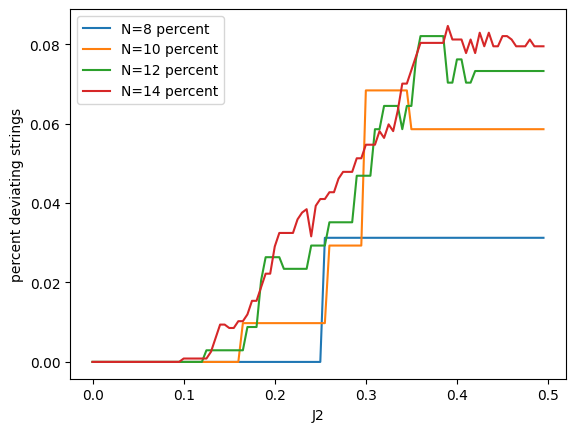

In [31]:
for i in range(len(Ns)):
    plt.plot(J2s, deviation_percent[i], label = f'N={Ns[i]} percent')
plt.legend(loc = 'best')
plt.xlabel('J2')
plt.ylabel('percent deviating strings')
plt.show()

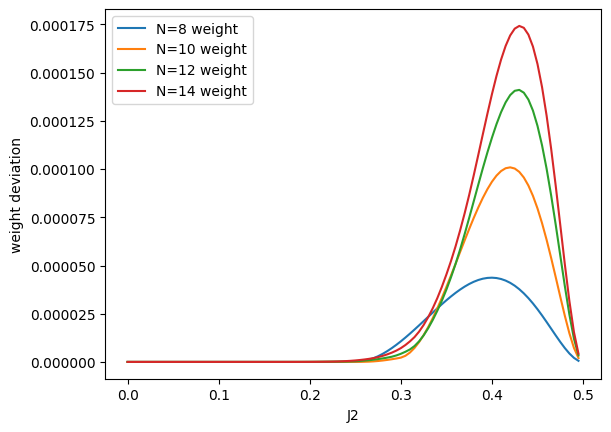

In [30]:
for i in range(len(Ns)):
    plt.plot(J2s, deviation_weight[i], label = f'N={Ns[i]} weight')
plt.legend(loc = 'best')
# plt.yscale('log')
plt.xlabel('J2')
plt.ylabel('weight deviation')
plt.show()

In [18]:
Ns = [8, 10, 12]
J2s_large = (1 / np.linspace(0 + 2 / 100, 2, 100))[::-1]
deviation_percent_large = []
deviation_weight_large = []
for N in Ns:
    percents = []; weights = []
    for J2 in J2s_large:
        gs = qt.qload(f'large_J2/N{N}/n{N}gs_J2_{round(J2, 4)}')
        states, signs = utils.get_nonzero_states(N, gs, 1e-10)
        pred_signs = [-1 + 2 * (magnetization.count_half_magnetization(i) % 2 ) for i in states]
        devs = utils.find_sign_deviations(states, pred_signs, signs)
        percents.append(len(devs) / 2 ** N)
        weights.append(sum(abs(gs[i][0]) ** 2 for i in devs))
    deviation_percent_large.append(percents)
    deviation_weight_large.append(weights)
deviation_percent_large = np.array(deviation_percent_large)
deviation_weight_large = np.array(deviation_weight_large)

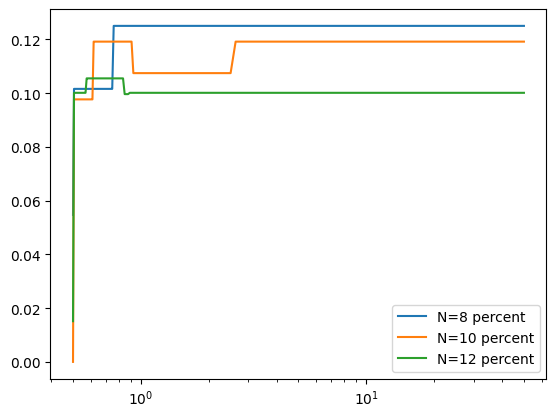

In [19]:
for i in range(len(Ns)):
    plt.plot(J2s_large, deviation_percent_large[i], label = f'N={Ns[i]} percent')
plt.legend(loc = 'best')
plt.xscale('log')
plt.show()

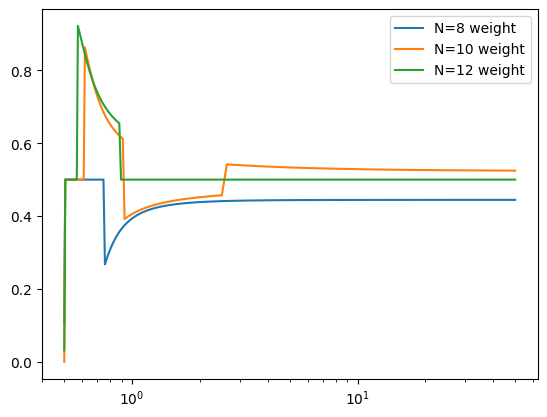

In [20]:
for i in range(len(Ns)):
    plt.plot(J2s_large, deviation_weight_large[i], label = f'N={Ns[i]} weight')
plt.legend(loc = 'best')
plt.xscale('log')
plt.show()

In [21]:
def manual_sr(x, N, shift=0):
    return sum(x[:, (i + shift) % N] + x[:, (i + 1 + shift) % N] for i in range(0, N, 4))
def quarter_mag(state):
    return sum(((state >> n) & 1) + ((state >> n + 1) & 1) for n in range(0, int(np.log2(state)) + 1, 4))

In [32]:
Ns = [8, 10, 12]

In [ ]:

J2s_large = (1 / np.linspace(0 + 2 / 100, 2, 100))[::-1]
deviation_percent_large = []
deviation_weight_large = []
for N in Ns:
    percents = []; weights = []
    for J2 in J2s_large:
        gs = qt.qload(f'large_J2/N{N}/n{N}gs_J2_{round(J2, 4)}')
        states, signs = utils.get_nonzero_states(N, gs, 1e-10)
        pred_signs = [-1 + 2 * (quarter_mag(i) % 2 ) for i in states]
        devs = utils.find_sign_deviations(states, pred_signs, signs)
        percents.append(len(devs) / 2 ** N)
        weights.append(sum(abs(gs[i][0]) ** 2 for i in devs))
    deviation_percent_large.append(percents)
    deviation_weight_large.append(weights)
deviation_percent_large = np.array(deviation_percent_large)
deviation_weight_large = np.array(deviation_weight_large)

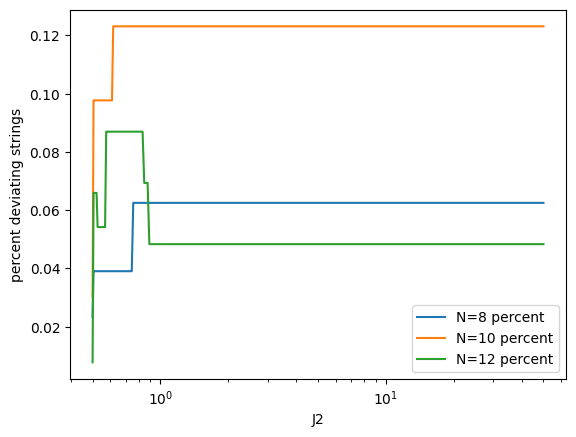

In [33]:
for i in range(len(Ns)):
    plt.plot(J2s_large, deviation_percent_large[i], label = f'N={Ns[i]} percent')
plt.legend(loc = 'best')
plt.xscale('log')
plt.xlabel('J2')
plt.ylabel('percent deviating strings')
plt.show()

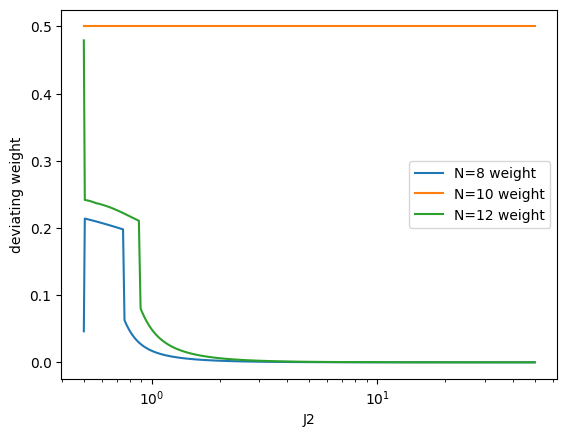

In [34]:
for i in range(len(Ns)):
    plt.plot(J2s_large, deviation_weight_large[i], label = f'N={Ns[i]} weight')
plt.legend(loc = 'best')
plt.xscale('log')
plt.xlabel('J2')
plt.ylabel('deviating weight')
plt.show()